## Decision Tree Classifier Implementation With Post Prunning And Preprunning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris

In [3]:
dataset=load_iris()

In [4]:
print(dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [13]:
import seaborn as sns
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [14]:
dataset.target[0:5]

array([0, 0, 0, 0, 0])

In [15]:
X = df.iloc[:, :-1]
y = dataset.target

In [16]:
X.shape, y.shape

((150, 4), (150,))

### For Decision trees do not do standard scaling

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size=0.33, random_state=42)

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
classifier = DecisionTreeClassifier()
classifier

DecisionTreeClassifier()

In [22]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [24]:
classifier.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [33]:
classifier_1 = DecisionTreeClassifier(criterion='entropy')


In [34]:
classifier_1.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

#### To display decision trees

[Text(0.4444444444444444, 0.9285714285714286, 'X[3] <= 0.8\nentropy = 1.583\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.3333333333333333, 0.7857142857142857, 'entropy = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.5555555555555556, 0.7857142857142857, 'X[3] <= 1.75\nentropy = 1.0\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.3333333333333333, 0.6428571428571429, 'X[2] <= 5.35\nentropy = 0.485\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(0.2222222222222222, 0.5, 'X[3] <= 1.45\nentropy = 0.31\nsamples = 36\nvalue = [0, 34, 2]'),
 Text(0.1111111111111111, 0.35714285714285715, 'entropy = 0.0\nsamples = 26\nvalue = [0, 26, 0]'),
 Text(0.3333333333333333, 0.35714285714285715, 'X[1] <= 2.6\nentropy = 0.722\nsamples = 10\nvalue = [0, 8, 2]'),
 Text(0.2222222222222222, 0.21428571428571427, 'X[0] <= 6.15\nentropy = 0.918\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.1111111111111111, 0.07142857142857142, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.3333333333333333, 0.07142857142

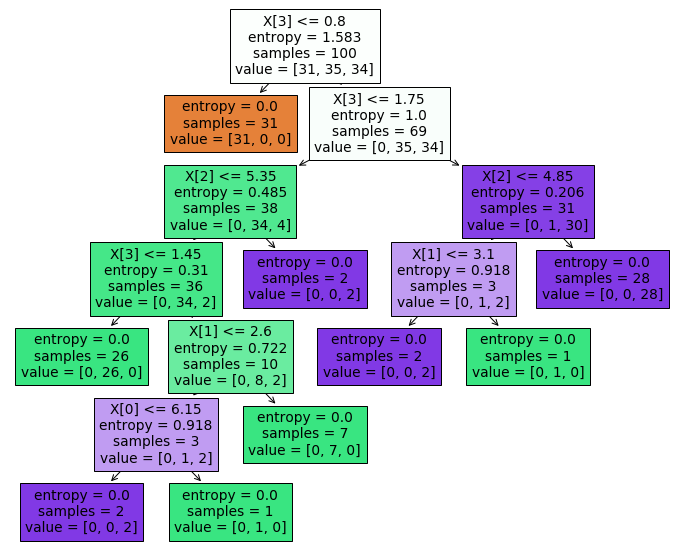

In [36]:
from sklearn import tree
plt.figure(figsize=(12, 10))
tree.plot_tree(classifier_1, filled = True)

In [ ]:
# Post pruning - For small dataset

In [28]:
classifier = DecisionTreeClassifier(criterion='entropy',
                                   max_depth=2)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

[Text(0.4, 0.8333333333333334, 'X[3] <= 0.8\nentropy = 1.583\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.6, 0.5, 'X[3] <= 1.75\nentropy = 1.0\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.485\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.206\nsamples = 31\nvalue = [0, 1, 30]')]

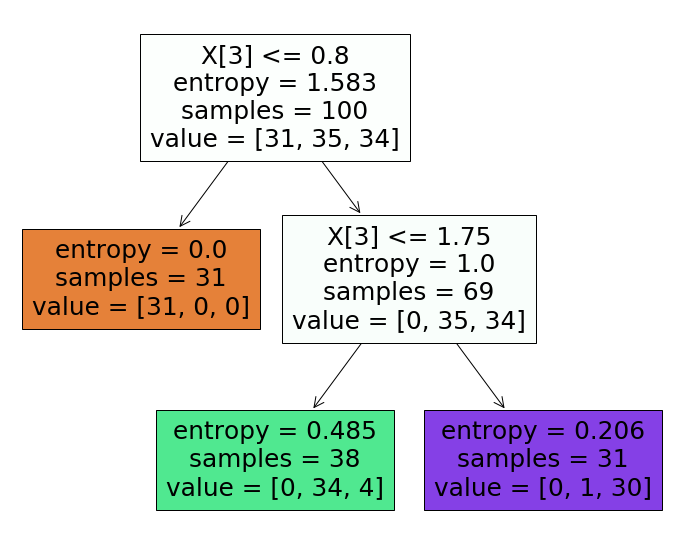

In [29]:
from sklearn import tree
plt.figure(figsize=(12, 10))
tree.plot_tree(classifier, filled = True)

In [30]:
### Above two levels are given

## Prediction

#### Before pruning

In [38]:
y_pred_1 = classifier_1.predict(X_test)
y_pred_1

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2])

In [39]:
from sklearn.metrics import accuracy_score, classification_report
score = accuracy_score(y_pred_1, y_test)

print(score)
print(classification_report(y_pred_1, y_test))

0.98
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.94      0.97        16
           2       0.94      1.00      0.97        15

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



#### We observed that there is not significant different in the score and classification report between without pruning and post pruning
#### This may be due to low volume of data

### After post pruning

In [41]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2])

In [42]:
from sklearn.metrics import accuracy_score, classification_report
score = accuracy_score(y_pred, y_test)

print(score)
print(classification_report(y_pred, y_test))

0.98
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.94      0.97        16
           2       0.94      1.00      0.97        15

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



## DecisionTree prepruning and hyperparameter tuning for huge data

In [45]:
import warnings
warnings.filterwarnings('ignore')

In [57]:

parameter = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best','random'],   # Which method to use for split
    'max_depth': [1, 2, 3, 4, 5],
    'max_features':['auto','sqrt','log2']
}  


In [58]:
parameter['criterion']

['gini', 'entropy', 'log_loss']

In [76]:
from sklearn.model_selection import GridSearchCV


In [77]:
classifier = DecisionTreeClassifier()
clf = GridSearchCV(classifier, param_grid=parameter, cv = 5, scoring = 'accuracy')
clf

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [78]:
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [79]:
clf.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features='log2')

In [80]:
clf.best_index_

52

In [81]:
clf.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'log2',
 'splitter': 'best'}

In [82]:
clf.best_score_

0.9400000000000001

In [83]:
clf.classes_

array([0, 1, 2])

In [84]:
#clf.cv_results_

In [85]:
y_pred = clf.predict(X_test)

In [86]:
from sklearn.metrics import accuracy_score, classification_report
score = accuracy_score(y_pred, y_test)

print(score)
print(classification_report(y_pred, y_test))

0.98
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.93      1.00      0.97        14
           2       1.00      0.94      0.97        17

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50

